# **Analyze EBs from Schumacher by integrating with ingest**

In [27]:
import scanpy as sc
import anndata as ad
import pandas as pd
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [28]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', fontsize=12)

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.5 louvain==0.8.2 pynndescent==0.5.13


**Read the standard object**

In [29]:
adata_ref = ad.read_h5ad('Processing/standardv2/Objects/object_1_Deng_filtered_1_2_Chen_filtered_1_3_Mohammed_filtered_1_4_Nowo_filtered_1_4bis_Nowo_filtered_1_5_Posfai_filtered_1_6_Arg_filtered_1.h5ad')
print(adata_ref)

AnnData object with n_obs × n_vars = 636 × 32330
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'


**Read the EBs object**

In [30]:
adata = ad.read_h5ad('Processing/Schu_ssVrij/Objects/object_8_Schu_filtered_1.h5ad') 
print(adata)

AnnData object with n_obs × n_vars = 2661 × 28027
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'


**Take genes present in the 2 datasets**

In [31]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

**Normalize data and search highly variable genes**

In [32]:
# Data normalization
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)
# Log on datas
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)
# Stock data logs 
adata_ref.raw = adata_ref
adata.raw = adata
# Scale the data
sc.pp.scale(adata_ref)
sc.pp.scale(adata)
# Highly variable genes
sc.pp.highly_variable_genes(adata_ref)
sc.pp.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:00)


C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\_utils\__init__.py:551: RuntimeWarning: overflow encountered in multiply
  return x * y


**Run PCA**

computing PCA
    with n_comps=50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


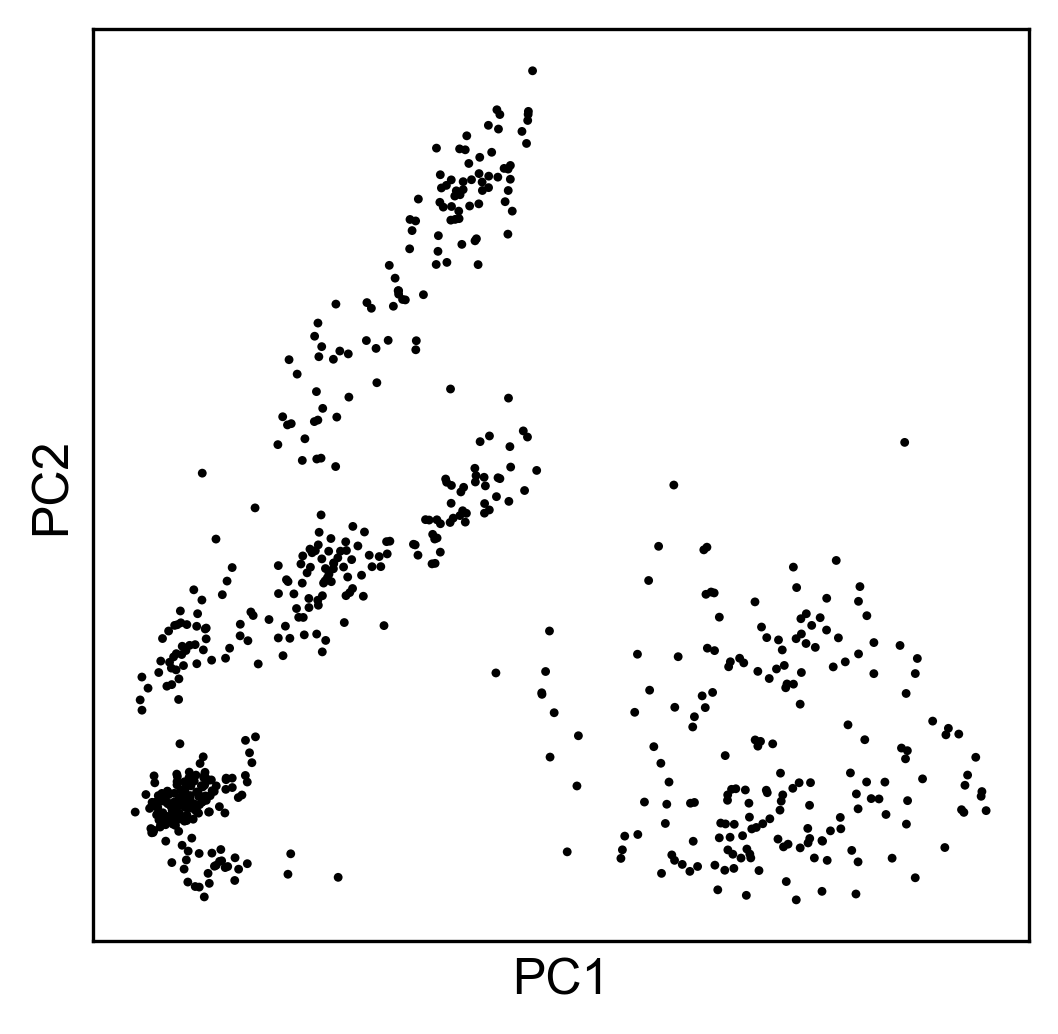

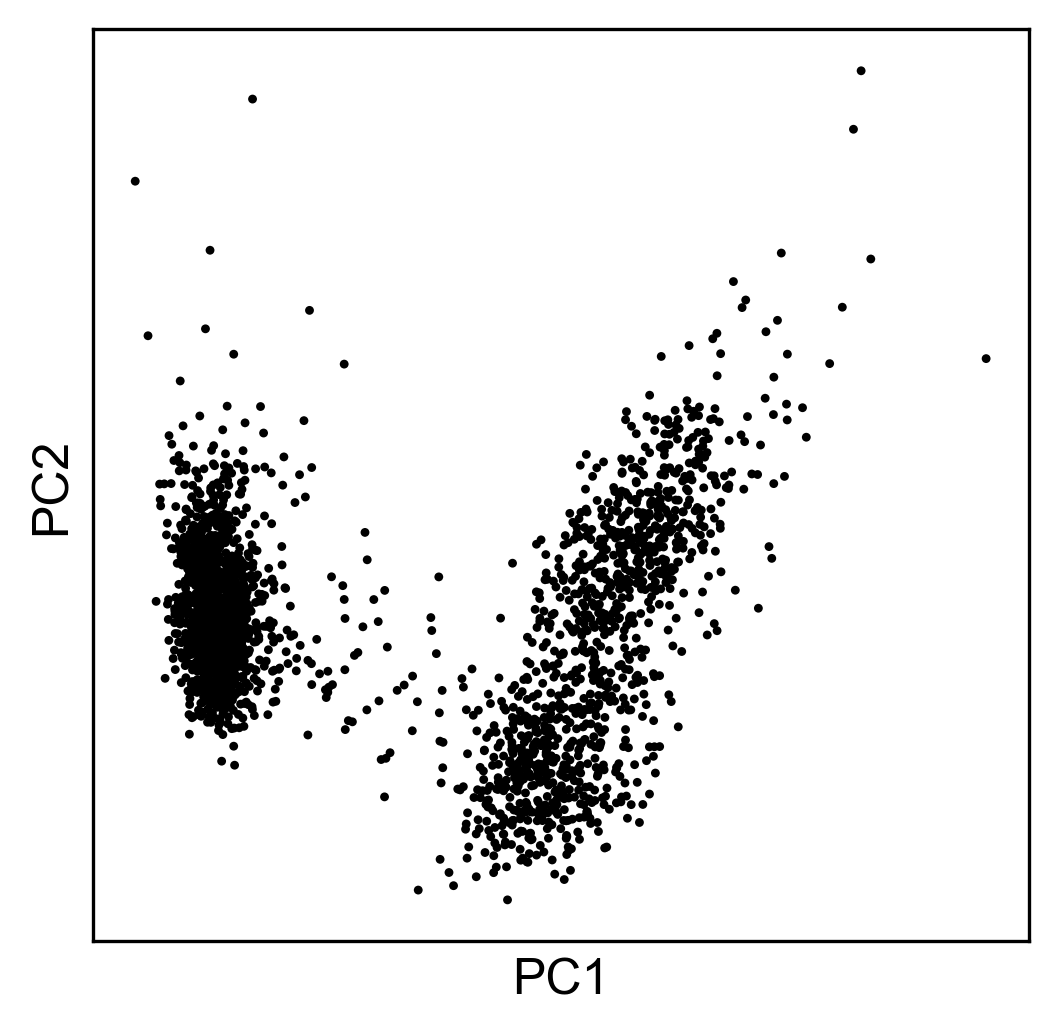

In [33]:
# Run PCA
sc.tl.pca(adata_ref)
sc.tl.pca(adata)
# PCA plot
sc.pl.pca(adata_ref, size=18, na_color = 'black')
sc.pl.pca(adata, size=18, na_color = 'black')

**Run harmony**

In [34]:
sc.external.pp.harmony_integrate(adata_ref, 'dataset', theta = 1, max_iter_harmony = 10, nclust = 3)
# Save new PCA
adata_ref.obsm['X_pca'] = adata_ref.obsm['X_pca_harmony']

2024-07-09 13:37:34,527 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
2024-07-09 13:37:35,703 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-09 13:37:35,705 - harmonypy - INFO - Iteration 1 of 10
2024-07-09 13:37:35,756 - harmonypy - INFO - Iteration 2 of 10
2024-07-09 13:37:35,844 - harmonypy - INFO - Iteration 3 of 10
2024-07-09 13:37:35,937 - harmonypy - INFO - Converged after 3 iterations


**Find neighbors**

In [35]:
# Find neighbors
sc.pp.neighbors(adata_ref, n_neighbors=50, n_pcs=20)
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)
# Make groups
sc.tl.louvain(adata_ref, resolution=0.8)
sc.tl.louvain(adata, resolution=0.8)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


**Run UMAP to verify the standard**

In [36]:
# Run UMAP
sc.tl.umap(adata_ref)
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


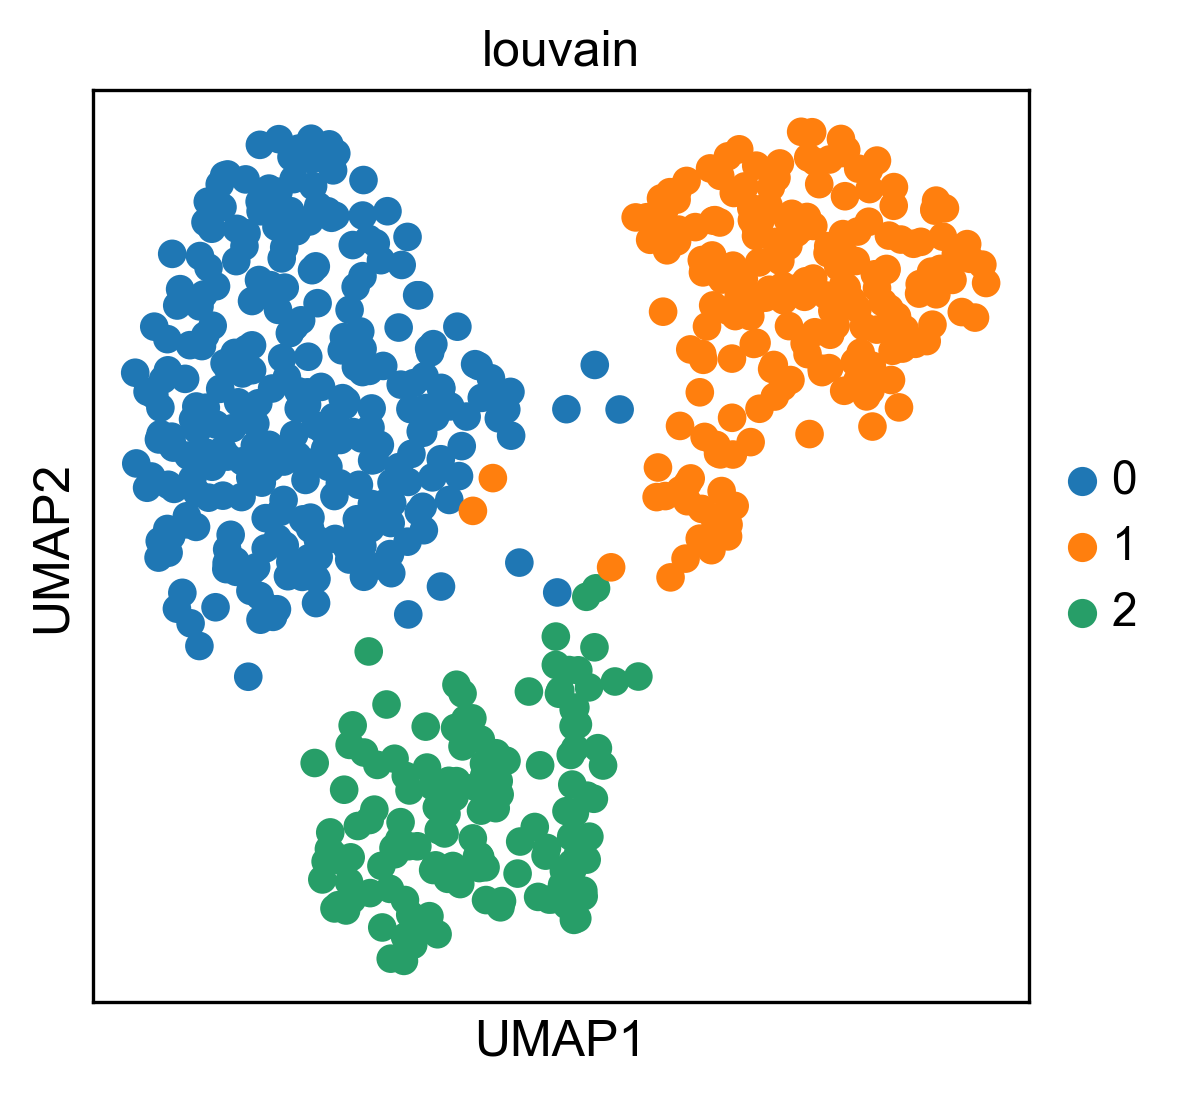

In [37]:
sc.pl.umap(adata_ref, color="louvain")

**Integrate embeddings and annotations of EBs with the standard through projecting on a PCA**

In [38]:
sc.tl.ingest(adata, adata_ref, obs="louvain")

running ingest


C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


    finished (0:00:13)


**Fix colors to have the same colors**

In [39]:
adata.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]  # fix colors

**Merge the 2 datasets**

In [40]:
adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])

C:\Users\learogue\AppData\Local\Temp\ipykernel_6120\327172098.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])


In [41]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype("category")

# fix category colors
adata_concat.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]

**Plot UMAPs**

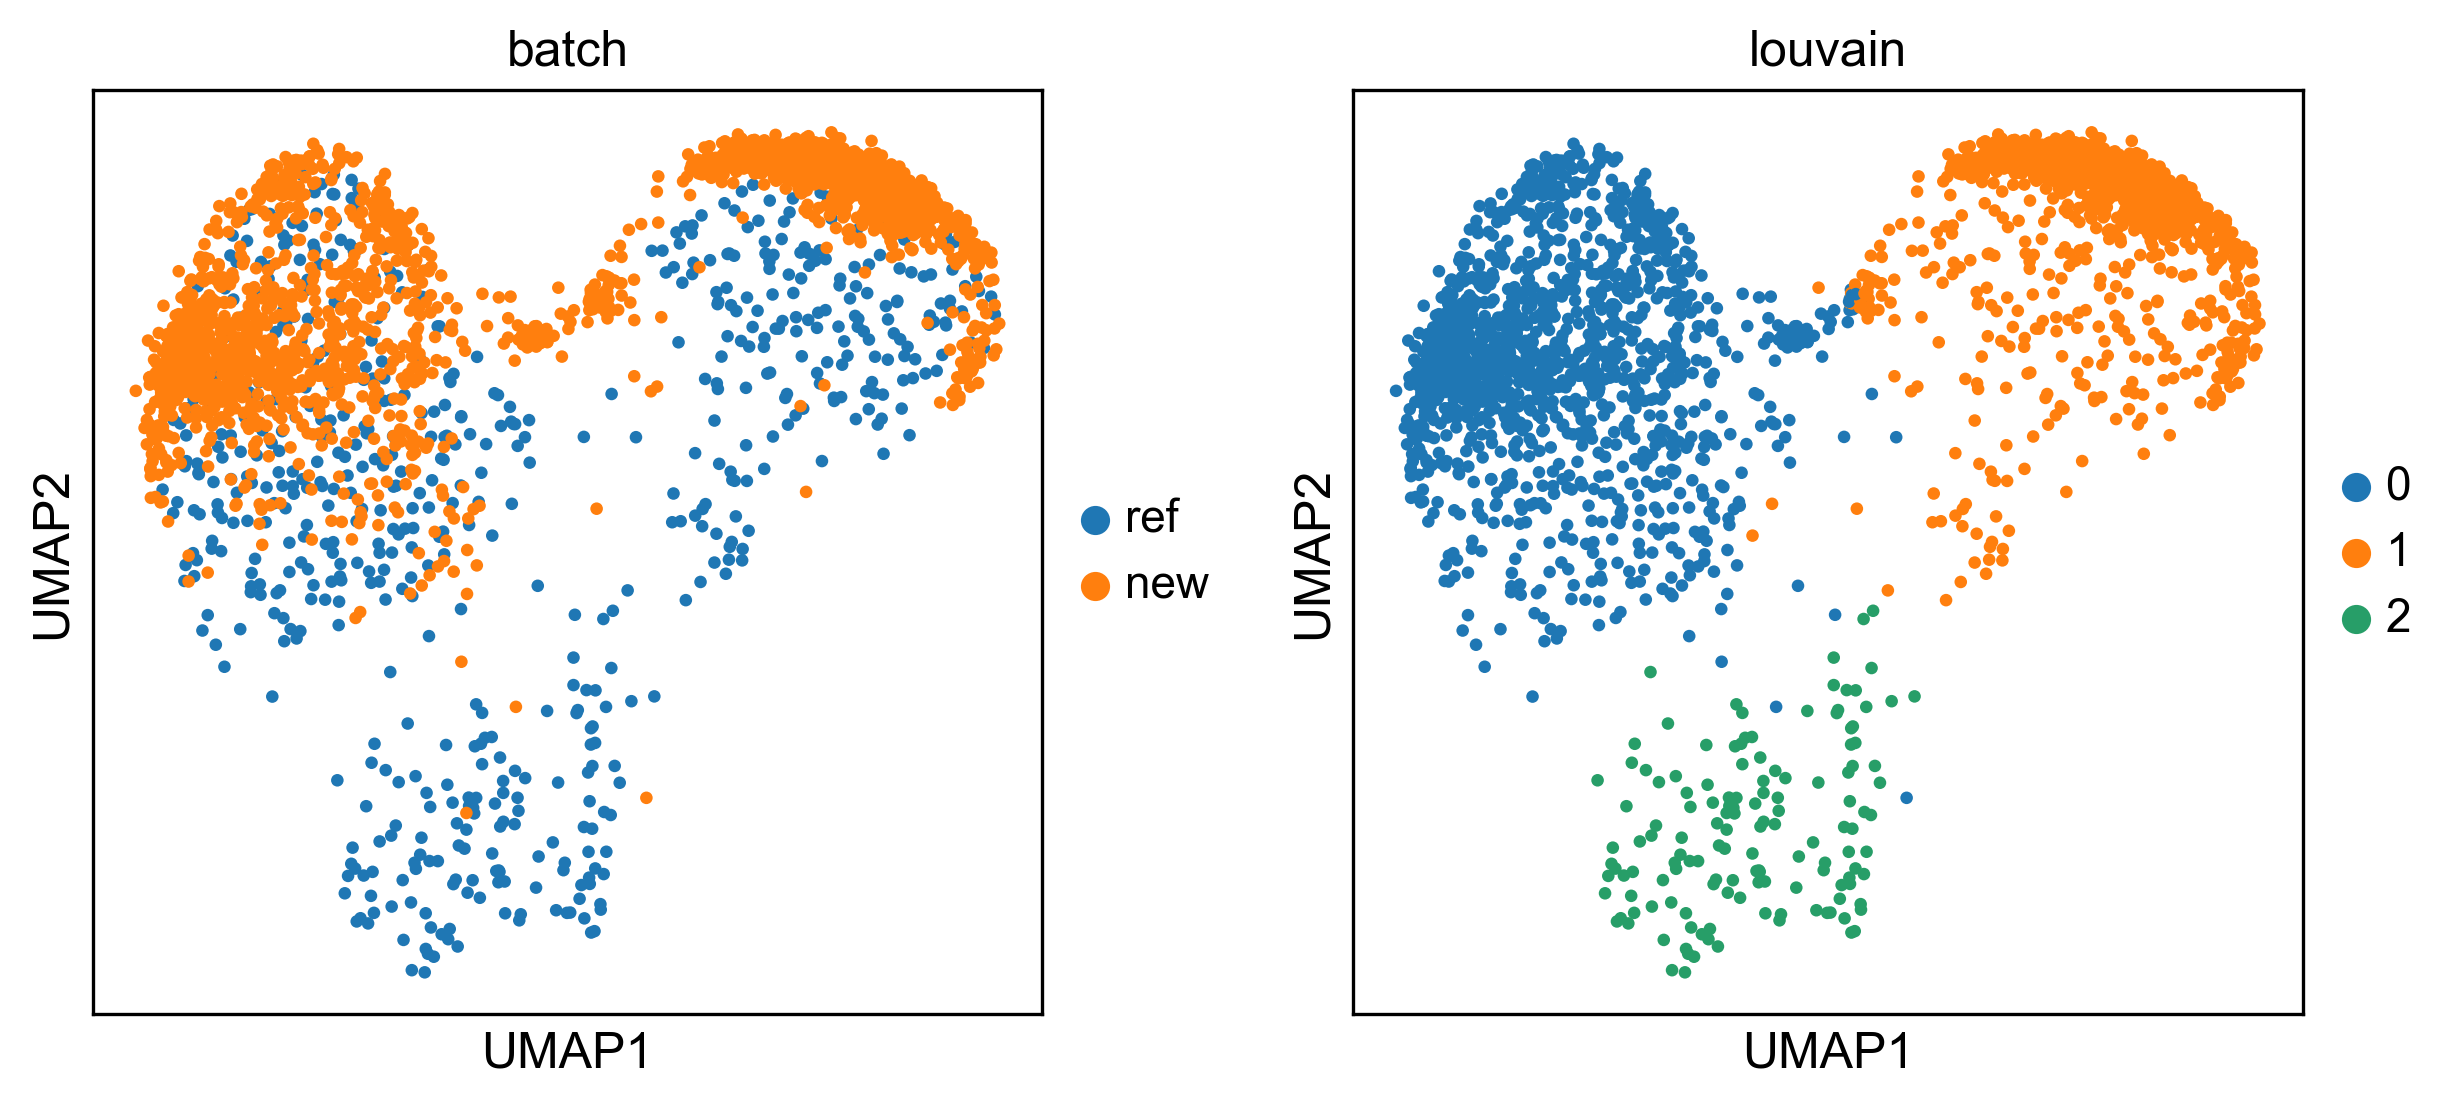

In [42]:
sc.pl.umap(adata_concat, color=["batch", "louvain"])

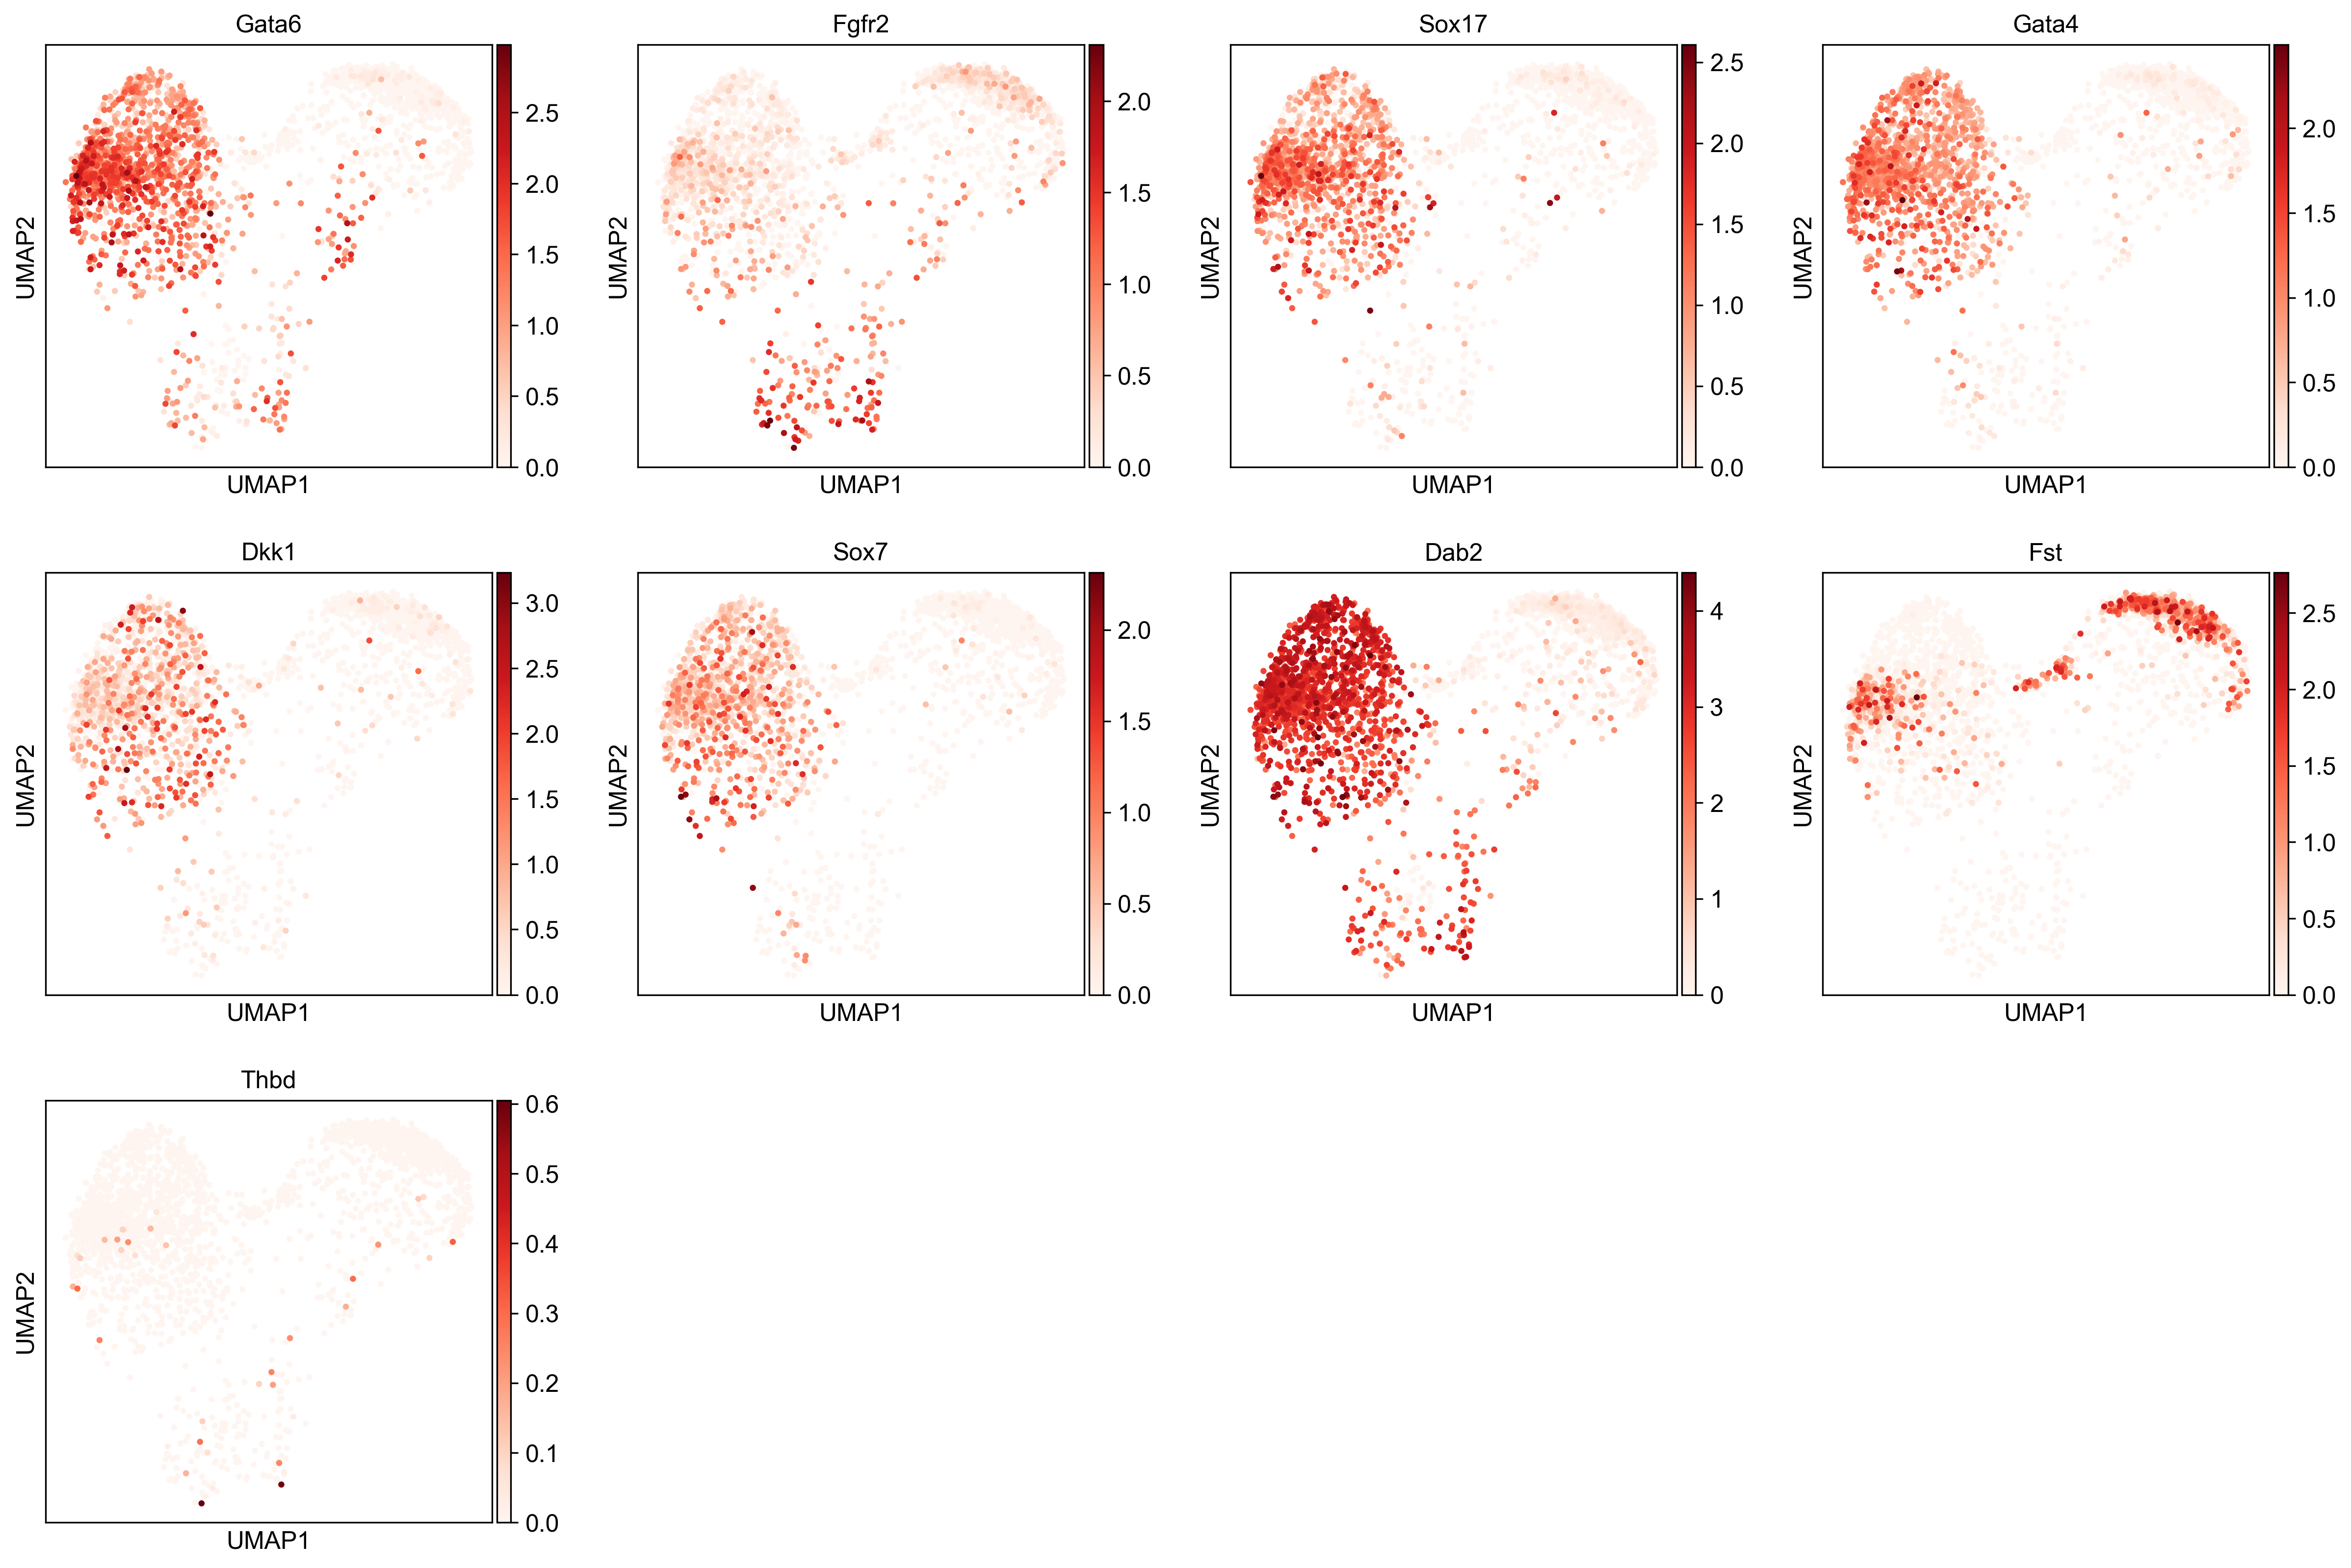

In [43]:
sc.pl.umap(adata_concat, color=['Gata6', 'Fgfr2', 'Sox17', 'Gata4', 'Dkk1', 'Sox7', 'Dab2', 'Fst', 'Thbd'], legend_loc='on data', color_map=mpl.cm.Reds)

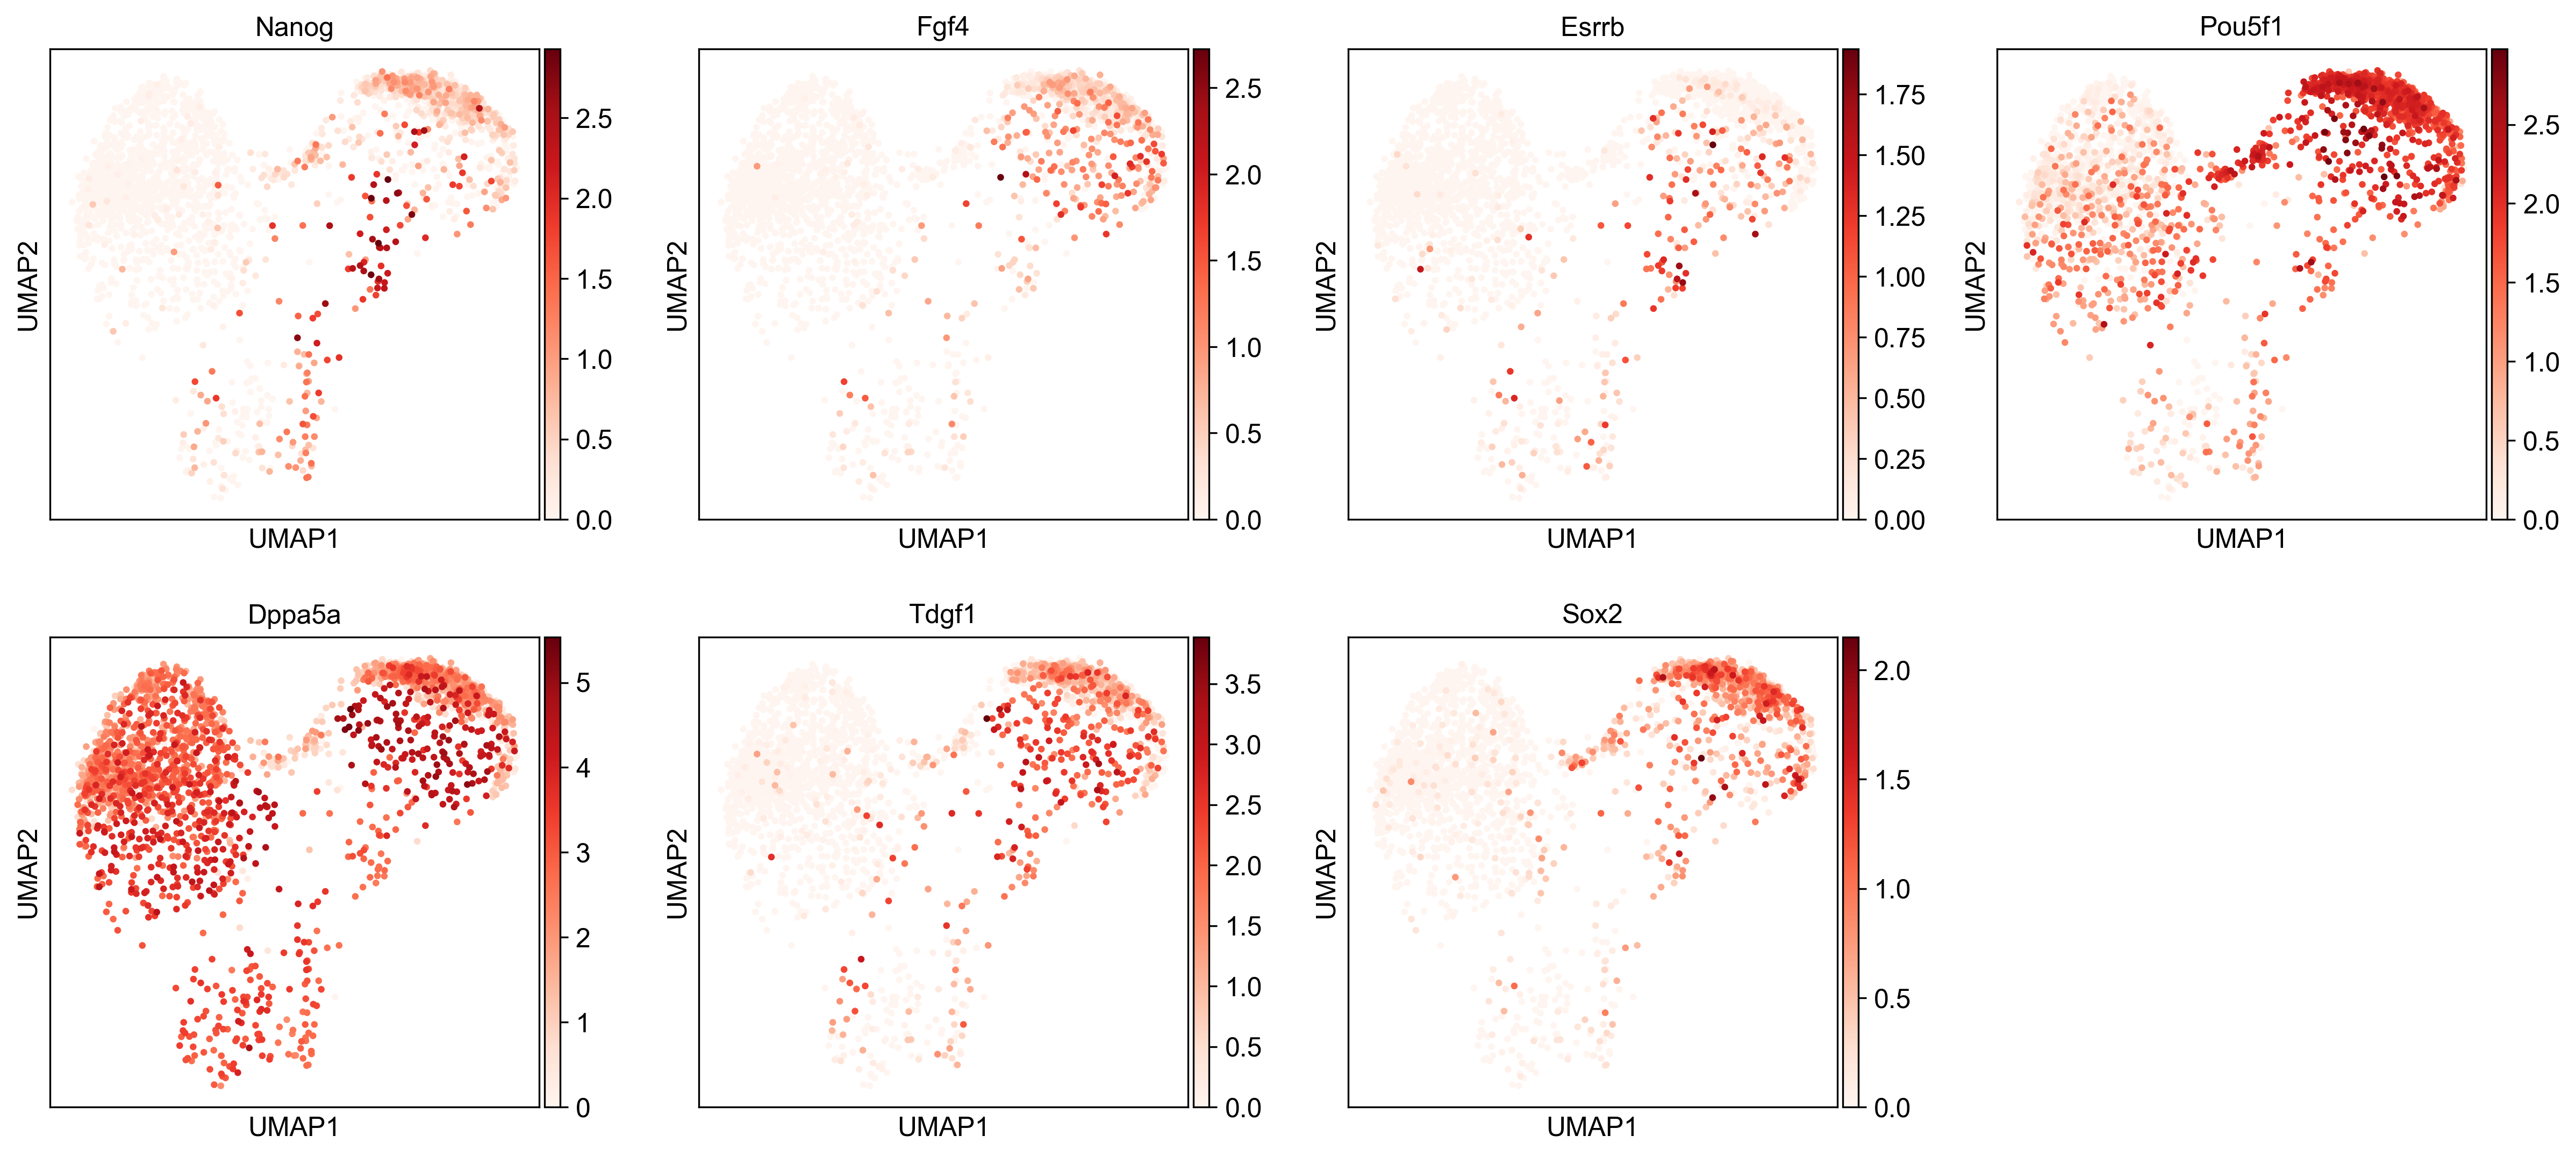

In [44]:
sc.pl.umap(adata_concat, color=['Nanog', 'Fgf4', 'Esrrb', 'Pou5f1', 'Dppa5a', 'Tdgf1', 'Sox2'], legend_loc='on data', color_map=mpl.cm.Reds)

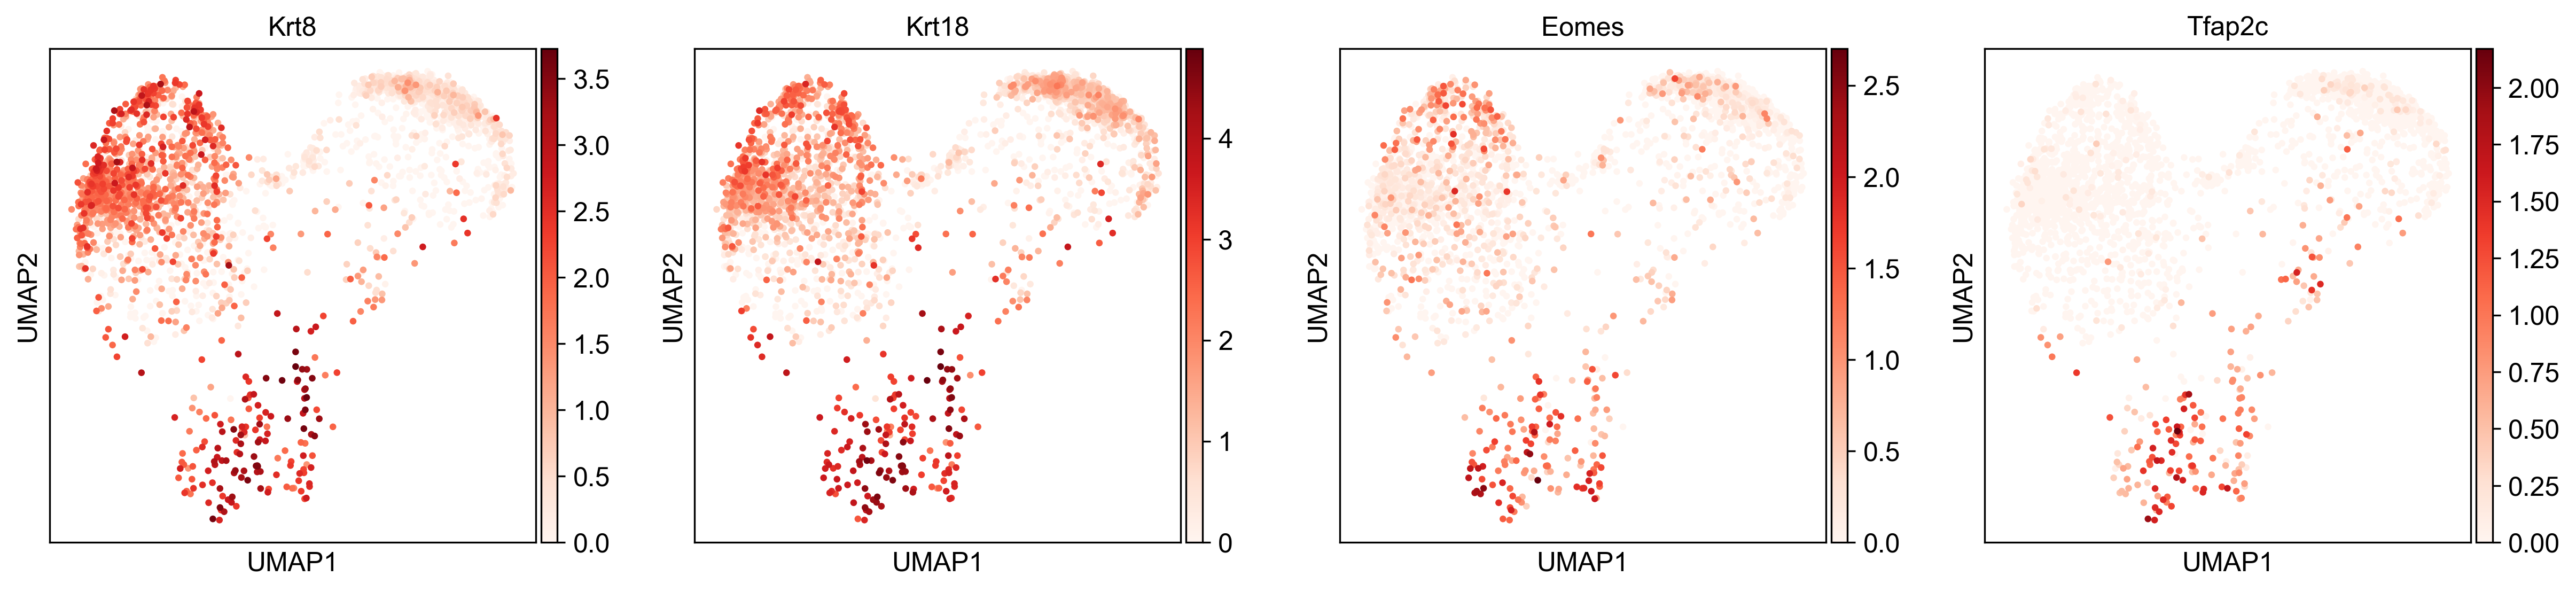

In [45]:
sc.pl.umap(adata_concat, color=['Krt8', 'Krt18', 'Eomes', 'Tfap2c'], legend_loc='on data', color_map=mpl.cm.Reds)

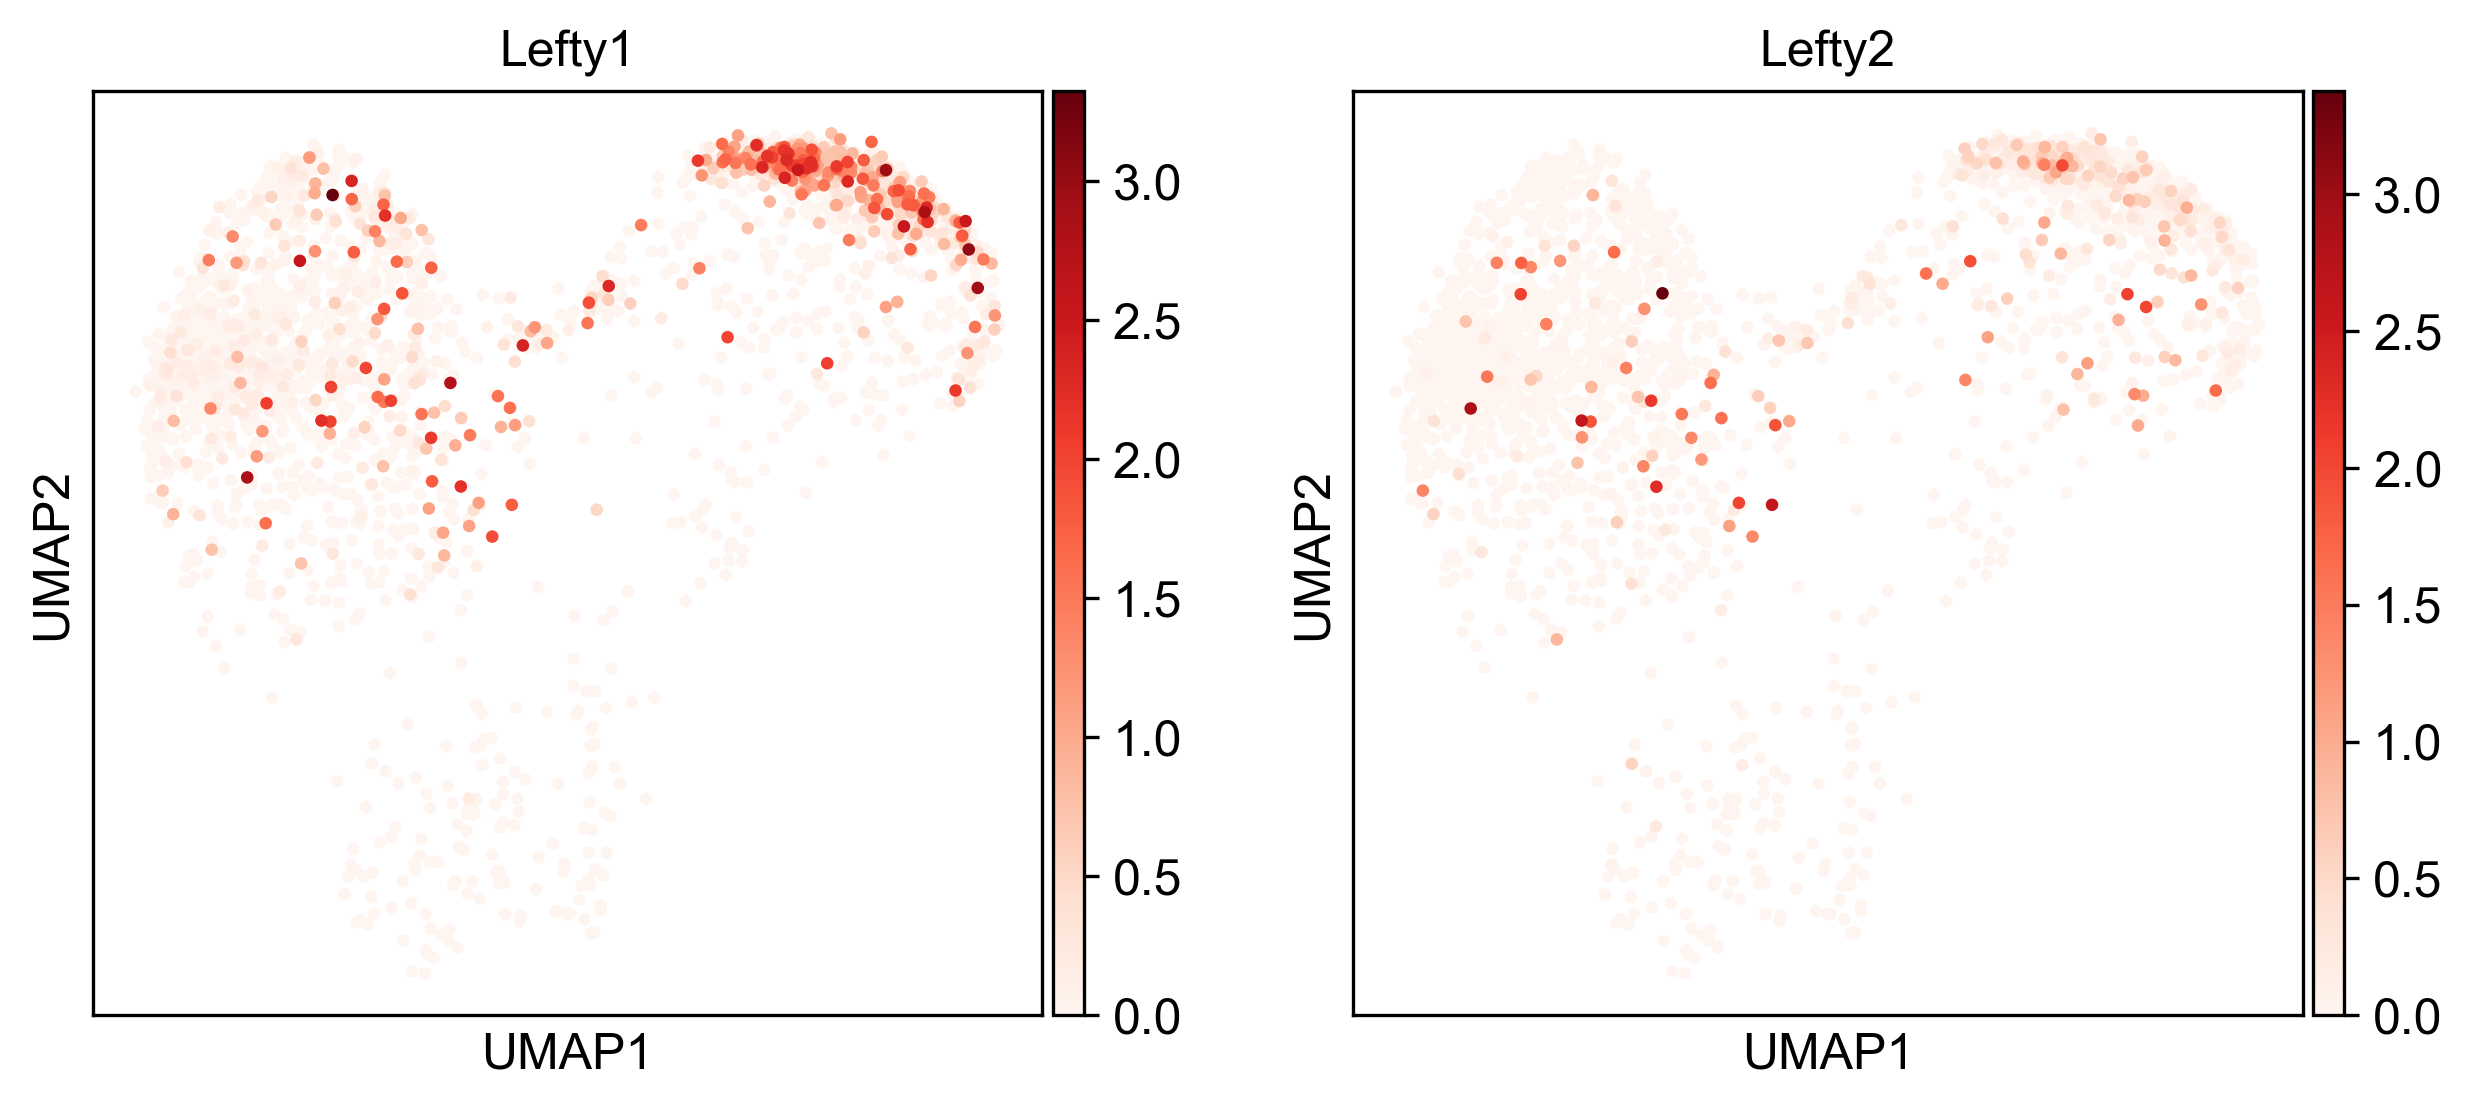

In [46]:
sc.pl.umap(adata_concat, color=['Lefty1', 'Lefty2'], legend_loc='on data', color_map=mpl.cm.Reds)

We see that the cells which expressed Fst group with Epiblast but Fst can be expressed in Epi cells.

# **With 500 cells**

I also try with 5000 cells to see the differences.

In [47]:
adata_ref = ad.read_h5ad('Processing/Vrij/Objects/object_1_Deng_filtered_1_2_Chen_filtered_1_3_Mohammed_filtered_1_4_Nowo_filtered_1_4bis_Nowo_filtered_1_5_Posfai_filtered_1_6_Arg_filtered_1.h5ad')
print(adata_ref)
adata = ad.read_h5ad('Processing/Schu_ssVrij/Objects/object_8_Schu_filtered_1_500cells.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 636 × 32330
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'
AnnData object with n_obs × n_vars = 500 × 28027
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'n_genes'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'


In [48]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]
# Data normalization
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)
# Log on datas
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)
# Stock data logs 
adata_ref.raw = adata_ref
adata.raw = adata
# Scale the data
sc.pp.scale(adata_ref)
sc.pp.scale(adata)
# Highly variable genes
sc.pp.highly_variable_genes(adata_ref)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.tl.pca(adata_ref)

sc.external.pp.harmony_integrate(adata_ref, 'dataset', theta = 1, max_iter_harmony = 10, nclust = 3)
# Save new PCA
adata_ref.obsm['X_pca'] = adata_ref.obsm['X_pca_harmony']

sc.pp.neighbors(adata_ref, n_neighbors=50, n_pcs=20)
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)
# Make groups
sc.tl.louvain(adata_ref, resolution=0.8)
sc.tl.louvain(adata, resolution=0.8)
sc.tl.umap(adata_ref)
sc.tl.umap(adata)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    with n_comps=50
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


2024-07-09 13:38:16,339 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
2024-07-09 13:38:17,486 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-09 13:38:17,494 - harmonypy - INFO - Iteration 1 of 10
2024-07-09 13:38:17,547 - harmonypy - INFO - Iteration 2 of 10
2024-07-09 13:38:17,627 - harmonypy - INFO - Iteration 3 of 10
2024-07-09 13:38:17,718 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02

In [49]:
sc.tl.ingest(adata, adata_ref, obs="louvain")


running ingest


C:\Users\learogue\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


    finished (0:00:05)


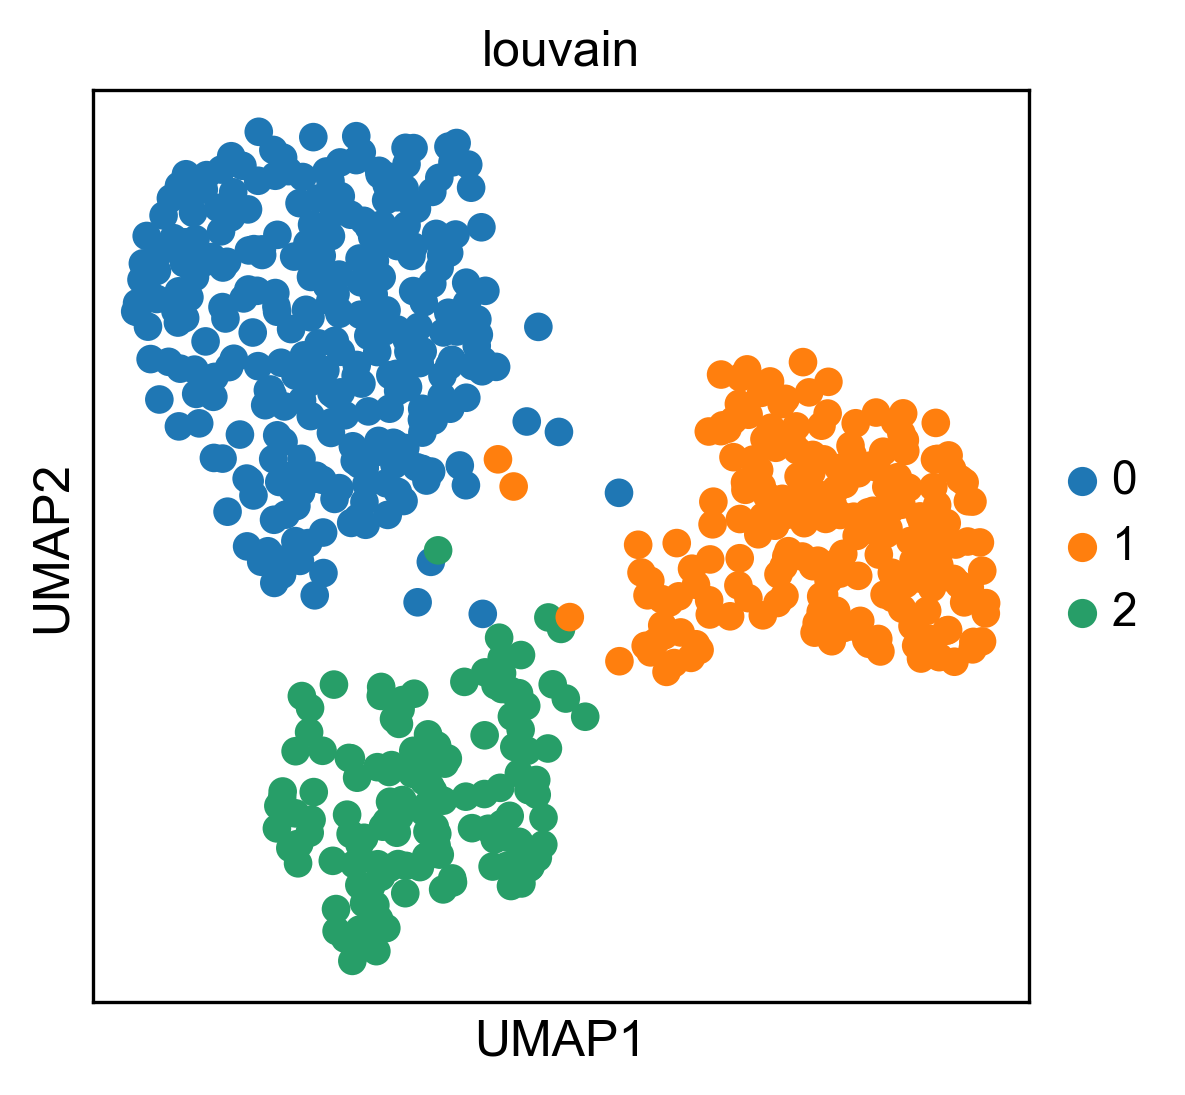

In [50]:
sc.pl.umap(adata_ref, color="louvain")

In [51]:
adata.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]  # fix colors
adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])
adata_concat.obs.louvain = adata_concat.obs.louvain.astype("category")

# fix category colors
adata_concat.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]

C:\Users\learogue\AppData\Local\Temp\ipykernel_6120\1268226102.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])


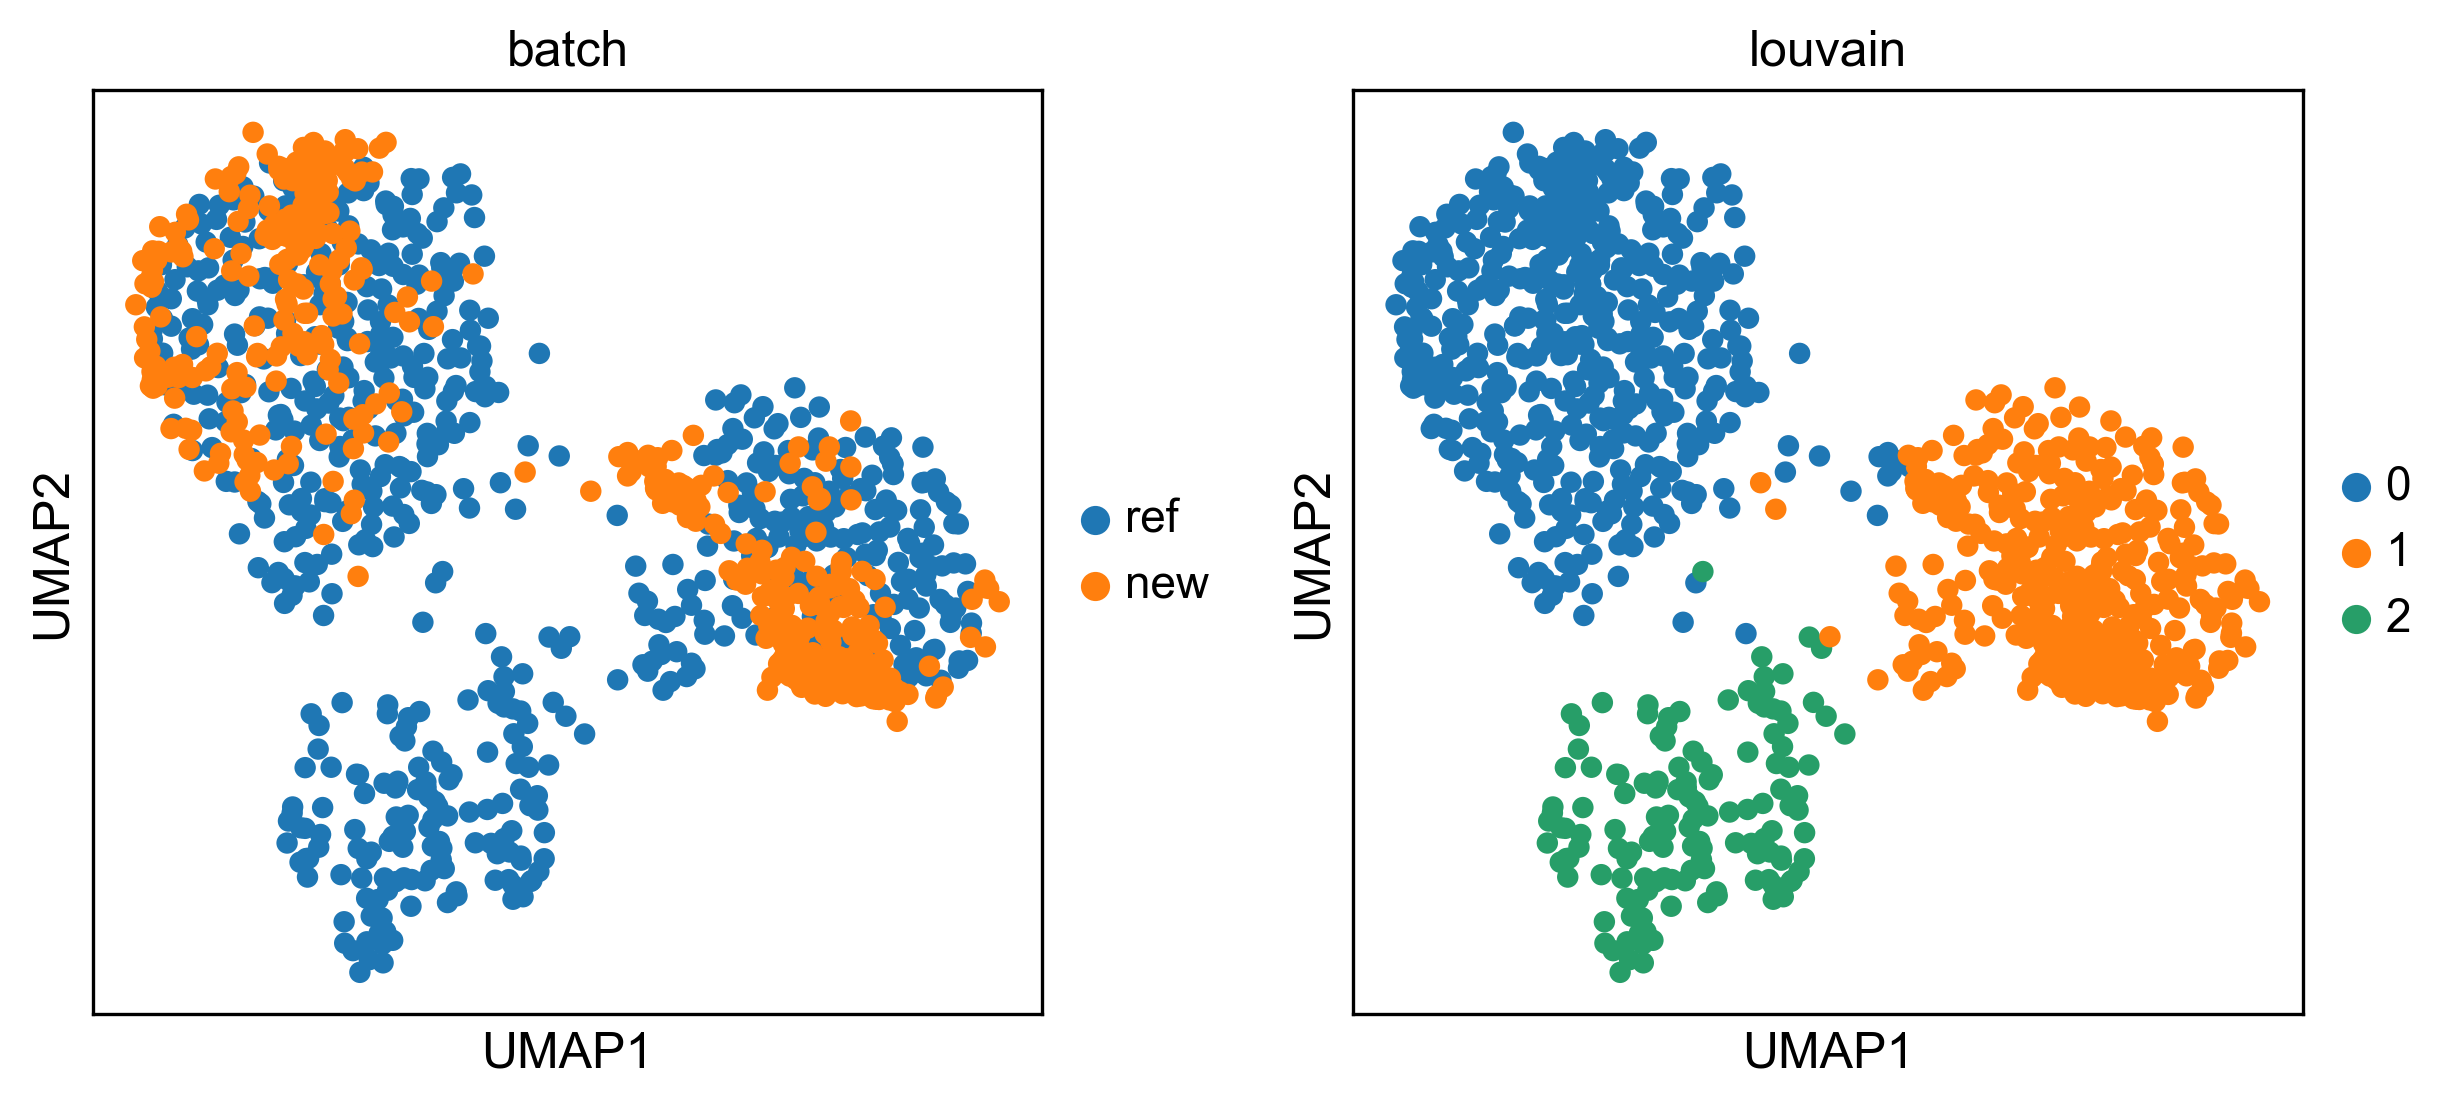

In [52]:
sc.pl.umap(adata_concat, color=["batch", "louvain"])

There is not really differences with all the cells.